In [1]:
import classes
import functies
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#puntje 2: definiëren van de functies
k, omega, p_0, p_0_x, phi, v, x, t = sp.symbols('k omega p_0 p_0_x phi v x t')

#max amplitude in functie van x 
drukamplitude_vergelijking = classes.vergelijking(p_0 * sp.sin(k*x + phi))
drukamplitude_parameters = ['k', 'p_0', 'phi']

def drukamplitude_model(X, parameters):
    K, P_0, PHI = parameters
    return P_0 * np.sin(K*X + PHI)

#amplitude in functie van tijd voor vaste x 
druktijd_vergelijking = classes.vergelijking(p_0*sp.cos(omega*t+phi)) #merk op dat dit niet per sé dezelfde phi is als voor x, maar is irrelevant voor de fitcode
druktijd_parameters = ['omega', 'p_0_x', 'phi']

def druktijd_model(T, parameters):
    omega, p_0, phi = parameters
    return p_0*np.cos(omega*T+phi)

#snelheid als omega en k gekend zijn
snelheid_vergelijking = classes.vergelijking(omega/k)

In [9]:
###sjoemeliere sjoemelare om de txt files met de data om te zetten in effectieve nuttige dataverwerkingen
#blah blah...

###TEST_DATA:

X = np.array([0,100,200,300]) #een vector met de x-coordinaten van de metingen
T = np.array(
    [ np.linspace(1,15),
      np.linspace(0,10), #een matrix met de tijden voor elke meting op elke x-coordinaat
      np.linspace(1,11),
      np.linspace(7, 27)
])

P = np.array(
    [ 0*np.linspace(1,15) + np.random.normal(0,1),
     0.5*np.sin(np.linspace(0,10)+3)+np.random.normal(0,1), #een matrix met coordinaten P[x_coordinaat][tijd] #random normale fouten ingevoegd voor de test
          np.sin(np.linspace(0,10)+np.random.normal(0,1)), 
      0.5*np.sin(np.linspace(0,10)-1)+np.random.normal(0,1)
])
P_fout = np.full(np.shape(P), 1) #een matrix van dezelfde vorm als P met de fouten in



xval = 0
def invals_amplitude(x,y):
    phiwaardes = [3,0,-1]
    return [1,1,phiwaardes[xval]] #op deze manier kunnen we handmatig de fasehoek vastleggen en zo de tekenfout bij P_0 voorkomen

def invals_vastex(x,y):
    return [0,0,0]

In [15]:
###vind de drukamplitude voor een vaste x-coordinaat
def fit_vaste_x(X, T, P, P_fout):
    """
    @IN:
    matrices X, T P en P_fout als gedefinieerd in vorige opgave
    @OUT:
    een lijst met maximale amplitude, in de volgorde van de x-coordinaat waarin ze voorkomen, en de pulsatie in datapuntvorm
    """
    P_0_x = []
    omega_x = []
    for xval in range(len(X)):
        druk = P[xval]
        drukfout = P_fout[xval]
        tijd = T[xval]
        tijdfit = functies.fit(druktijd_parameters, druktijd_model, invals_amplitude, tijd, druk, drukfout)
        print('\n\n')
        print(tijdfit, 'tijdfit')
        omega_x.append(functies.vector_to_datapunt(tijdfit[0].copy(), omega))
        P_0_x.append(tijdfit[1].copy())
    OMEGA = functies.mu_sigma(omega_x, omega)
    return P_0_x, OMEGA

#fix de drukamplitude naar de x-coordinaat
def fit_naar_x(X, P_0_x, P_0_x_ERR):
    fitwaardes = functies.fit(drukamplitude_parameters, drukamplitude_model, invals_vastex, X, P_0_x, P_0_x_ERR)
    K = functies.vector_to_datapunt(fitwaardes[0], k)
    P_0 = functies.vector_to_datapunt(fitwaardes[1], p_0)
    PHI = functies.vector_to_datapunt(fitwaardes[2], phi)
    return K, P_0, PHI

#voor de experimenten met vaste frequentie:
def fix_data(X, T, P, P_fout):
    P_0_x_lijst, OMEGA = fit_vaste_x(X, T, P, P_fout)
    P_0_x = [P_0_x_elem[0] for P_0_x_elem in P_0_x_lijst]
    P_0_x_ERR = [P_0_x_elem[1] for P_0_x_elem in P_0_x_lijst]
    K, P_0, PHI = fit_naar_x(X, P_0_x, P_0_x_ERR)

    x_fit = np.linspace(0,300)
    druk_fit = P_0.get_val()*np.sin(K.get_val()*x_fit+PHI.get_val())
    #plot het boeltje
    fig, ax = plt.subplots(1,1)
    ax.errorbar(X, P_0_x, yerr = P_0_x_ERR, label = 'gemeten')

    ax.plot(x_fit, druk_fit, label = 'model')

    ax.set_ylabel('$P_0$ [EENHEID]')
    ax.set_xlabel('x (mm)')
    ax.legend("drukamplitude in functie van positie")
    ax.legend()
    plt.tight_layout()
    plt.show()

    #bereken de snelheid
    snelheid = functies.data_analyse(snelheid_vergelijking, [OMEGA, K], v)
    print(snelheid)

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 43.39293485334464
             x: [ 1.091e+00  2.417e-01  3.840e+00]
           nit: 98
          nfev: 175
 final_simplex: (array([[ 1.091e+00,  2.417e-01,  3.840e+00],
                       [ 1.091e+00,  2.417e-01,  3.840e+00],
                       [ 1.091e+00,  2.417e-01,  3.840e+00],
                       [ 1.091e+00,  2.417e-01,  3.840e+00]]), array([ 4.339e+01,  4.339e+01,  4.339e+01,  4.339e+01]))
[[0.4660213858172925, 1.7146912603613438], [-0.13126813634018403, 0.6146621334738293], [2.06950487426179, 5.610460342043165]]
omega heeft als waarde: 1.0908 + 0.62389 - 0.62478 met 68% betrouwbaarheidsinterval: [0.46602, 1.7147] 
p_0_x heeft als waarde: 0.2417 + 0.37297 - 0.37296 met 68% betrouwbaarheidsinterval: [-0.13127, 0.61466] 
phi heeft als waarde: 3.84 + 1.7705 - 1.7705 met 68% betrouwbaarheidsinterval: [2.0695, 5.6105] 
De p-waarde voor de hypothese test 

c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


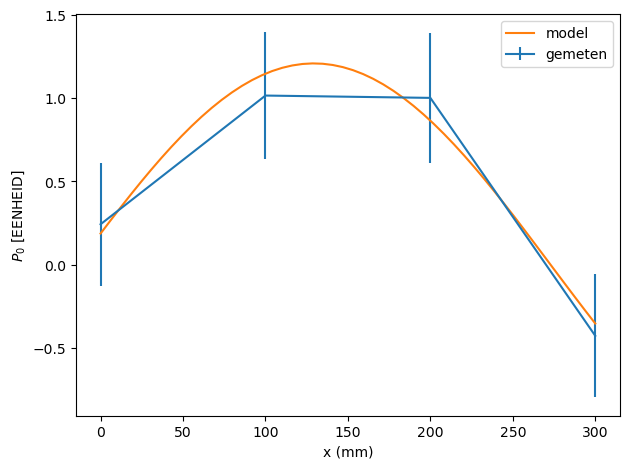

datapunt: v = [76.4124597974441, 40.9981610616343, 'Normaal']


In [16]:
#### Hier volgt de effectieve data-analyse
fix_data(X, T, P, P_fout)

p_0
<class 'sympy.core.symbol.Symbol'>
p_0
<class 'str'>
